# Submission

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats
import sklearn.metrics
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import classification_report,accuracy_score

After exploring the different model optimization techniques, we will use all useful techinques to build a more robust model

## <a id='section1'>Import Dataset</a>

In [2]:
eqData_train1 = pd.read_csv('train_values.csv')
eqData_train1.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [3]:
eqData_train2 = pd.read_csv('train_labels.csv')
eqData_train2.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


Concatenate both train files into a single train dataset

In [4]:
cols = list(pd.read_csv("train_values.csv", nrows =1))
temp = pd.read_csv('train_values.csv',usecols =[i for i in cols if i != 'building_id'])

eqData_train = pd.concat([eqData_train2, temp], axis = 1)
eqData_train.head()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0


## <a id='section2'>Cleaning the Data for Model Training</a>
Perform One Hot Encoding

In [5]:
categoricalcolumns = ["land_surface_condition", "foundation_type","roof_type","ground_floor_type","other_floor_type","position","plan_configuration", "legal_ownership_status"]
eqData_train = pd.get_dummies(eqData_train, columns= categoricalcolumns, prefix= categoricalcolumns)
print(eqData_train)

        building_id  damage_grade  geo_level_1_id  geo_level_2_id  \
0            802906             3               6             487   
1             28830             2               8             900   
2             94947             3              21             363   
3            590882             2              22             418   
4            201944             3              11             131   
...             ...           ...             ...             ...   
260596       688636             2              25            1335   
260597       669485             3              17             715   
260598       602512             3              17              51   
260599       151409             2              26              39   
260600       747594             3              21               9   

        geo_level_3_id  count_floors_pre_eq  age  area_percentage  \
0                12198                    2   30                6   
1                 2812           

Drop 'building_id' from the dataset, and perform train_test_split.

In [6]:
TEST_SIZE = 0.2

filteredData1 = eqData_train

filteredData1 = eqData_train.drop(['building_id'], axis=1)
train_df, test_df = train_test_split(filteredData1, stratify=filteredData1['damage_grade'], test_size=TEST_SIZE)

train_X = train_df.drop("damage_grade", axis=1)
train_Y = train_df["damage_grade"]
test_X = test_df.drop("damage_grade", axis=1)
test_Y = test_df["damage_grade"]

## <a id='section3'>Feature Importance</a>

In [7]:
train_X_new = train_X[['geo_level_3_id' , 'geo_level_2_id', 'geo_level_1_id' , 'age', 'area_percentage', 'height_percentage' , 'count_families', 'foundation_type_r','count_floors_pre_eq', 'has_superstructure_mud_mortar_stone', 'has_superstructure_timber','ground_floor_type_v','land_surface_condition_t','land_surface_condition_n','position_s','has_superstructure_adobe_mud','has_superstructure_cement_mortar_brick','ground_floor_type_f','has_secondary_use','roof_type_n','roof_type_q']]
test_X_new = test_X[['geo_level_3_id' , 'geo_level_2_id', 'geo_level_1_id' , 'age', 'area_percentage', 'height_percentage' , 'count_families', 'foundation_type_r','count_floors_pre_eq', 'has_superstructure_mud_mortar_stone', 'has_superstructure_timber','ground_floor_type_v','land_surface_condition_t','land_surface_condition_n','position_s','has_superstructure_adobe_mud','has_superstructure_cement_mortar_brick','ground_floor_type_f','has_secondary_use','roof_type_n','roof_type_q']]

## <a id='section3'>Feature Engineering</a>

In [8]:
from sklearn.decomposition import PCA
pca_2D = PCA(n_components=2)
pca_output_2D = pca_2D.fit_transform(train_X_new.values)
print('Explained variation per principal component: {}'.format(pca_2D.explained_variance_ratio_))

Explained variation per principal component: [0.98692774 0.01265973]


In [9]:
pca_output_2D=pd.DataFrame(pca_output_2D)
pca_output_2D.columns=['x','y']
pca_output_2D.head()

,x,y
0,-2281.230423,642.337999
1,-4357.225929,683.444794
2,-3120.244129,380.291588
3,3886.737626,70.784148
4,-2876.249416,278.265259


1. Outlier Capping

In [10]:
from feature_engine import outlier_removers as outr

# set up the capper
capper = outr.Winsorizer(
        distribution='gaussian', tail='both', fold=1.5, variables=['age', 'area_percentage','height_percentage'])

# fit the capper
capper.fit(train_X_new)

# transform the data
train_t= capper.transform(train_X_new)
test_t= capper.transform(test_X_new)

capper.right_tail_caps_

{'age': 137.46158287580255,
 'area_percentage': 14.587761062359956,
 'height_percentage': 8.304854943781605}

2. Variable Discretisaion

In [11]:
from feature_engine import discretisers as dsc

# set up the discretisation transformer
disc = dsc.EqualWidthDiscretiser(bins=120, variables=['geo_level_3_id'])

# fit the transformer
disc.fit(train_t)

# transform the data
train_g= disc.transform(train_t)
test_g= disc.transform(test_t)

disc.binner_dict_

{'geo_level_3_id': [-inf,
  104.725,
  209.45,
  314.17499999999995,
  418.9,
  523.625,
  628.3499999999999,
  733.0749999999999,
  837.8,
  942.525,
  1047.25,
  1151.975,
  1256.6999999999998,
  1361.425,
  1466.1499999999999,
  1570.875,
  1675.6,
  1780.3249999999998,
  1885.05,
  1989.7749999999999,
  2094.5,
  2199.225,
  2303.95,
  2408.6749999999997,
  2513.3999999999996,
  2618.125,
  2722.85,
  2827.575,
  2932.2999999999997,
  3037.0249999999996,
  3141.75,
  3246.475,
  3351.2,
  3455.9249999999997,
  3560.6499999999996,
  3665.375,
  3770.1,
  3874.825,
  3979.5499999999997,
  4084.2749999999996,
  4189.0,
  4293.724999999999,
  4398.45,
  4503.175,
  4607.9,
  4712.625,
  4817.349999999999,
  4922.075,
  5026.799999999999,
  5131.525,
  5236.25,
  5340.974999999999,
  5445.7,
  5550.424999999999,
  5655.15,
  5759.875,
  5864.599999999999,
  5969.325,
  6074.049999999999,
  6178.775,
  6283.5,
  6388.224999999999,
  6492.95,
  6597.674999999999,
  6702.4,
  6807.125,
  6

In [12]:
from feature_engine import discretisers as dsc

# set up the discretisation transformer
disc = dsc.EqualWidthDiscretiser(bins=40, variables=['geo_level_1_id'])

# fit the transformer
disc.fit(train_g)

# transform the data
train_g1= disc.transform(train_g)
test_g1= disc.transform(test_g)

disc.binner_dict_

{'geo_level_1_id': [-inf,
  0.75,
  1.5,
  2.25,
  3.0,
  3.75,
  4.5,
  5.25,
  6.0,
  6.75,
  7.5,
  8.25,
  9.0,
  9.75,
  10.5,
  11.25,
  12.0,
  12.75,
  13.5,
  14.25,
  15.0,
  15.75,
  16.5,
  17.25,
  18.0,
  18.75,
  19.5,
  20.25,
  21.0,
  21.75,
  22.5,
  23.25,
  24.0,
  24.75,
  25.5,
  26.25,
  27.0,
  27.75,
  28.5,
  29.25,
  inf]}

3. Variable Transformation

In [13]:
#Log geo_level_2/3 
train_g1['geo_level_3_id'] = np.log(train_g1['geo_level_3_id'].replace(0, 1))
test_g1['geo_level_3_id'] = np.log(test_g1['geo_level_3_id'].replace(0, 1))
train_g1['geo_level_2_id'] = np.log(train_g1['geo_level_2_id'].replace(0, 1))
test_g1['geo_level_2_id'] = np.log(test_g1['geo_level_2_id'].replace(0, 1))

,geo_level_3_id,geo_level_2_id,geo_level_1_id,age,area_percentage,height_percentage,count_families,foundation_type_r,count_floors_pre_eq,has_superstructure_mud_mortar_stone,...,ground_floor_type_v,land_surface_condition_t,land_surface_condition_n,position_s,has_superstructure_adobe_mud,has_superstructure_cement_mortar_brick,ground_floor_type_f,has_secondary_use,roof_type_n,roof_type_q
55763,3.610918,7.202661,10,60.0,6.000000,6.0,1,1,3,1,...,0,1,0,0,0,0,1,0,0,1
16475,2.890372,7.232733,7,45.0,8.000000,5.0,1,1,2,1,...,0,1,0,1,0,0,1,0,1,0
78831,3.367296,6.985642,34,25.0,11.000000,8.0,1,1,2,1,...,0,1,0,1,0,0,1,0,1,0
255297,4.564348,6.648985,11,0.0,4.000000,5.0,1,1,2,1,...,0,1,0,0,0,0,0,0,1,0
181303,3.465736,6.886532,10,10.0,4.000000,6.0,1,1,2,1,...,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147439,3.637586,5.509388,22,0.0,6.000000,6.0,0,0,2,0,...,0,0,1,1,0,0,1,1,1,0
80343,4.143135,7.031741,34,5.0,5.000000,5.0,1,0,2,0,...,0,1,0,1,0,0,1,0,1,0
161991,4.276666,7.028201,27,15.0,8.000000,6.0,1,1,3,1,...,0,0,1,1,0,0,1,0,0,1
147847,3.988984,7.133296,7,0.0,12.000000,3.0,1,1,1,0,...,0,1,0,0,1,0,0,0,1,0


In [15]:
# Age 995 (Binary)
train_g1.loc[train_g1.age == 995, 'Age 995'] = '1' 
train_g1.loc[train_g1.age != 995, 'Age 995'] = '0' 
train_g1['Age 995'] = train_g1[['Age 995']].apply(pd.to_numeric)
test_g1.loc[test_g1.age == 995, 'Age 995'] = '1' 
test_g1.loc[test_g1.age != 995, 'Age 995'] = '0' 
test_g1['Age 995'] = test_g1[['Age 995']].apply(pd.to_numeric)
display (train_g1)

,geo_level_3_id,geo_level_2_id,geo_level_1_id,age,area_percentage,height_percentage,count_families,foundation_type_r,count_floors_pre_eq,has_superstructure_mud_mortar_stone,...,land_surface_condition_t,land_surface_condition_n,position_s,has_superstructure_adobe_mud,has_superstructure_cement_mortar_brick,ground_floor_type_f,has_secondary_use,roof_type_n,roof_type_q,Age 995
55763,3.610918,7.202661,10,60.0,6.000000,6.0,1,1,3,1,...,1,0,0,0,0,1,0,0,1,0
16475,2.890372,7.232733,7,45.0,8.000000,5.0,1,1,2,1,...,1,0,1,0,0,1,0,1,0,0
78831,3.367296,6.985642,34,25.0,11.000000,8.0,1,1,2,1,...,1,0,1,0,0,1,0,1,0,0
255297,4.564348,6.648985,11,0.0,4.000000,5.0,1,1,2,1,...,1,0,0,0,0,0,0,1,0,0
181303,3.465736,6.886532,10,10.0,4.000000,6.0,1,1,2,1,...,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147439,3.637586,5.509388,22,0.0,6.000000,6.0,0,0,2,0,...,0,1,1,0,0,1,1,1,0,0
80343,4.143135,7.031741,34,5.0,5.000000,5.0,1,0,2,0,...,1,0,1,0,0,1,0,1,0,0
161991,4.276666,7.028201,27,15.0,8.000000,6.0,1,1,3,1,...,0,1,1,0,0,1,0,0,1,0
147847,3.988984,7.133296,7,0.0,12.000000,3.0,1,1,1,0,...,1,0,0,1,0,0,0,1,0,0


## <a id='section4'>Hyperparameter Tuning</a>

[3 2 2 ... 3 2 2]
The standard accuracy score is:  0.7278256364996835
The recall score is:  0.7278256364996835
The matthew's correlation coefficient is:  0.4877330344419507


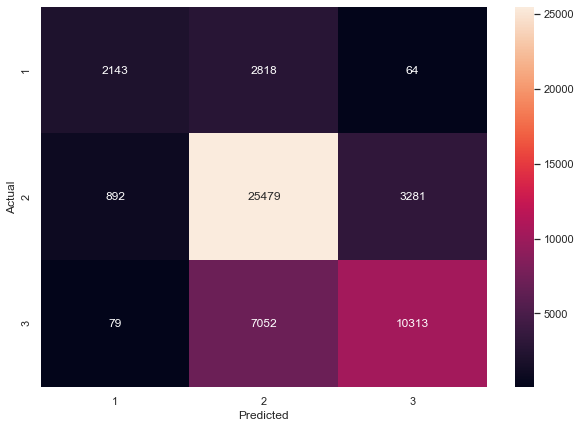

In [16]:
clf = RandomForestClassifier(n_jobs=4, 
                             random_state=0,
                             min_samples_leaf = 1,
                             min_samples_split =10,
                             max_depth = 32,
                             criterion="gini",
                             n_estimators=250,
                             verbose=False)

clf.fit(train_g1, train_Y.values)
preds = clf.predict(test_g1)
print(preds)

print("The standard accuracy score is: ", accuracy_score(test_Y.values, preds))
print("The recall score is: ", sklearn.metrics.recall_score(test_Y.values, preds, average='micro'))
print("The matthew's correlation coefficient is: ", sklearn.metrics.matthews_corrcoef(test_Y.values, preds))

cm = pd.crosstab(test_Y.values, preds, rownames=['Actual'], colnames=['Predicted'])

#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.show()

## <a id='section5'>Prediction Submission</a>

In [17]:
test_values_df = pd.read_csv('test_values.csv')
display(test_values_df)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,310028,4,605,3623,3,70,20,6,t,r,...,1,0,0,0,0,0,0,0,0,0
86864,663567,10,1407,11907,3,25,6,7,n,r,...,0,0,0,0,0,0,0,0,0,0
86865,1049160,22,1136,7712,1,50,3,3,t,r,...,0,0,0,0,0,0,0,0,0,0
86866,442785,6,1041,912,2,5,9,5,t,r,...,0,0,0,0,0,0,0,0,0,0


1. One-Hot Encoding

In [18]:
categoricalcolumns = ["land_surface_condition", "foundation_type","roof_type","ground_floor_type","other_floor_type","position","plan_configuration", "legal_ownership_status"]
DATA = pd.get_dummies(test_values_df, columns= categoricalcolumns, prefix= categoricalcolumns)
print(DATA)

       building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0           300051              17             596           11307   
1            99355               6             141           11987   
2           890251              22              19           10044   
3           745817              26              39             633   
4           421793              17             289            7970   
...            ...             ...             ...             ...   
86863       310028               4             605            3623   
86864       663567              10            1407           11907   
86865      1049160              22            1136            7712   
86866       442785               6            1041             912   
86867       501372              26              36            6436   

       count_floors_pre_eq  age  area_percentage  height_percentage  \
0                        3   20                7                  6   
1                

2. Feature Importance

In [19]:
test_X_new = DATA[['geo_level_3_id' , 'geo_level_2_id', 'geo_level_1_id' , 'age', 'area_percentage', 'height_percentage' , 'count_families', 'foundation_type_r','count_floors_pre_eq', 'has_superstructure_mud_mortar_stone', 'has_superstructure_timber','ground_floor_type_v','land_surface_condition_t','land_surface_condition_n','position_s','has_superstructure_adobe_mud','has_superstructure_cement_mortar_brick','ground_floor_type_f','has_secondary_use','roof_type_n','roof_type_q']]

3. Feature Engineering

In [22]:
from feature_engine import outlier_removers as outr

# set up the capper
capper = outr.Winsorizer(
        distribution='gaussian', tail='both', fold=1.5, variables=['age', 'area_percentage','height_percentage'])

# fit the capper
capper.fit(test_X_new)

# transform the data
test_t= capper.transform(test_X_new)

capper.right_tail_caps_

{'age': 136.67040172327208,
 'area_percentage': 14.580755266654457,
 'height_percentage': 8.29652371590429}

In [23]:
from feature_engine import discretisers as dsc

# set up the discretisation transformer
disc = dsc.EqualWidthDiscretiser(bins=120, variables=['geo_level_3_id'])

# fit the transformer
disc.fit(test_t)

# transform the data
test_g= disc.transform(test_t)

disc.binner_dict_

{'geo_level_3_id': [-inf,
  104.725,
  209.45,
  314.17499999999995,
  418.9,
  523.625,
  628.3499999999999,
  733.0749999999999,
  837.8,
  942.525,
  1047.25,
  1151.975,
  1256.6999999999998,
  1361.425,
  1466.1499999999999,
  1570.875,
  1675.6,
  1780.3249999999998,
  1885.05,
  1989.7749999999999,
  2094.5,
  2199.225,
  2303.95,
  2408.6749999999997,
  2513.3999999999996,
  2618.125,
  2722.85,
  2827.575,
  2932.2999999999997,
  3037.0249999999996,
  3141.75,
  3246.475,
  3351.2,
  3455.9249999999997,
  3560.6499999999996,
  3665.375,
  3770.1,
  3874.825,
  3979.5499999999997,
  4084.2749999999996,
  4189.0,
  4293.724999999999,
  4398.45,
  4503.175,
  4607.9,
  4712.625,
  4817.349999999999,
  4922.075,
  5026.799999999999,
  5131.525,
  5236.25,
  5340.974999999999,
  5445.7,
  5550.424999999999,
  5655.15,
  5759.875,
  5864.599999999999,
  5969.325,
  6074.049999999999,
  6178.775,
  6283.5,
  6388.224999999999,
  6492.95,
  6597.674999999999,
  6702.4,
  6807.125,
  6

In [24]:
from feature_engine import discretisers as dsc

# set up the discretisation transformer
disc = dsc.EqualWidthDiscretiser(bins=40, variables=['geo_level_1_id'])

# fit the transformer
disc.fit(test_g)

# transform the data
test_g1= disc.transform(test_g)

disc.binner_dict_

{'geo_level_1_id': [-inf,
  0.75,
  1.5,
  2.25,
  3.0,
  3.75,
  4.5,
  5.25,
  6.0,
  6.75,
  7.5,
  8.25,
  9.0,
  9.75,
  10.5,
  11.25,
  12.0,
  12.75,
  13.5,
  14.25,
  15.0,
  15.75,
  16.5,
  17.25,
  18.0,
  18.75,
  19.5,
  20.25,
  21.0,
  21.75,
  22.5,
  23.25,
  24.0,
  24.75,
  25.5,
  26.25,
  27.0,
  27.75,
  28.5,
  29.25,
  inf]}

In [25]:
#Log geo_level_2/3 
test_g1['geo_level_3_id'] = np.log(test_g1['geo_level_3_id'].replace(0, 1))
test_g1['geo_level_2_id'] = np.log(test_g1['geo_level_2_id'].replace(0, 1))

In [27]:
# Age 995 (Binary) 
test_g1.loc[test_g1.age == 995, 'Age 995'] = '1' 
test_g1.loc[test_g1.age != 995, 'Age 995'] = '0' 
test_g1['Age 995'] = test_g1[['Age 995']].apply(pd.to_numeric)
display (test_g1)

,geo_level_3_id,geo_level_2_id,geo_level_1_id,age,area_percentage,height_percentage,count_families,foundation_type_r,count_floors_pre_eq,has_superstructure_mud_mortar_stone,...,land_surface_condition_t,land_surface_condition_n,position_s,has_superstructure_adobe_mud,has_superstructure_cement_mortar_brick,ground_floor_type_f,has_secondary_use,roof_type_n,roof_type_q,Age 995
0,4.672829,6.390241,22,20.0,7.000000,6.0,1,1,3,1,...,1,0,1,0,0,1,0,1,0,0
1,4.736198,4.948760,7,25.0,13.000000,5.0,1,1,2,1,...,1,0,1,0,0,1,1,1,0,0
2,4.553877,2.944439,29,5.0,4.000000,5.0,1,1,2,1,...,1,0,1,0,0,1,0,1,0,0
3,1.791759,3.663562,34,0.0,14.580755,3.0,2,1,1,0,...,1,0,0,0,1,0,1,0,0,0
4,4.330733,5.666427,22,15.0,8.000000,7.0,1,1,3,1,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,3.526361,6.405228,5,70.0,14.580755,6.0,1,1,3,1,...,1,0,0,0,0,1,1,0,1,0
86864,4.727388,7.249215,13,25.0,6.000000,7.0,1,1,3,1,...,0,1,1,1,0,1,0,1,0,0
86865,4.290459,7.035269,29,50.0,3.000000,3.0,1,1,1,1,...,1,0,1,0,0,1,0,1,0,0
86866,2.079442,6.947937,7,5.0,9.000000,5.0,1,1,2,1,...,1,0,1,1,0,1,0,1,0,0


In [33]:
submission = clf.predict(test_g1)

# Convert predictions to dataframe
submission_predictions_df = pd.DataFrame(submission, columns=["Damage_grade"])
print(submission_predictions_df)

       Damage_grade
0                 3
1                 2
2                 2
3                 1
4                 3
...             ...
86863             2
86864             2
86865             2
86866             2
86867             1

[86868 rows x 1 columns]


In [34]:
# Get building ids from test_values.csv
submission_df = pd.read_csv("./test_values.csv")
submission_df = submission_df["building_id"]
submission_df.head()

0    300051
1     99355
2    890251
3    745817
4    421793
Name: building_id, dtype: int64

In [35]:
# Join building ids with predictions
result = pd.concat([submission_df, submission_predictions_df], axis=1, sort=False)
result.set_index('building_id', inplace=True)
result.head()

,Damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3


## Final Result
322th position out of 2392 competitors with a F1 Score of 0.7276 (Top 13% of competitors) <br/>


![alt text](image.png "Results")
